# Transformer-based LM

### Seepch and Language Processing (3rd ed. draft) by Jurafsky and Martin (https://web.stanford.edu/~jurafsky/slp3/)
### The Illustrated Transformers (https://jalammar.github.io/illustrated-transformer/)

### Round Up : Transformer

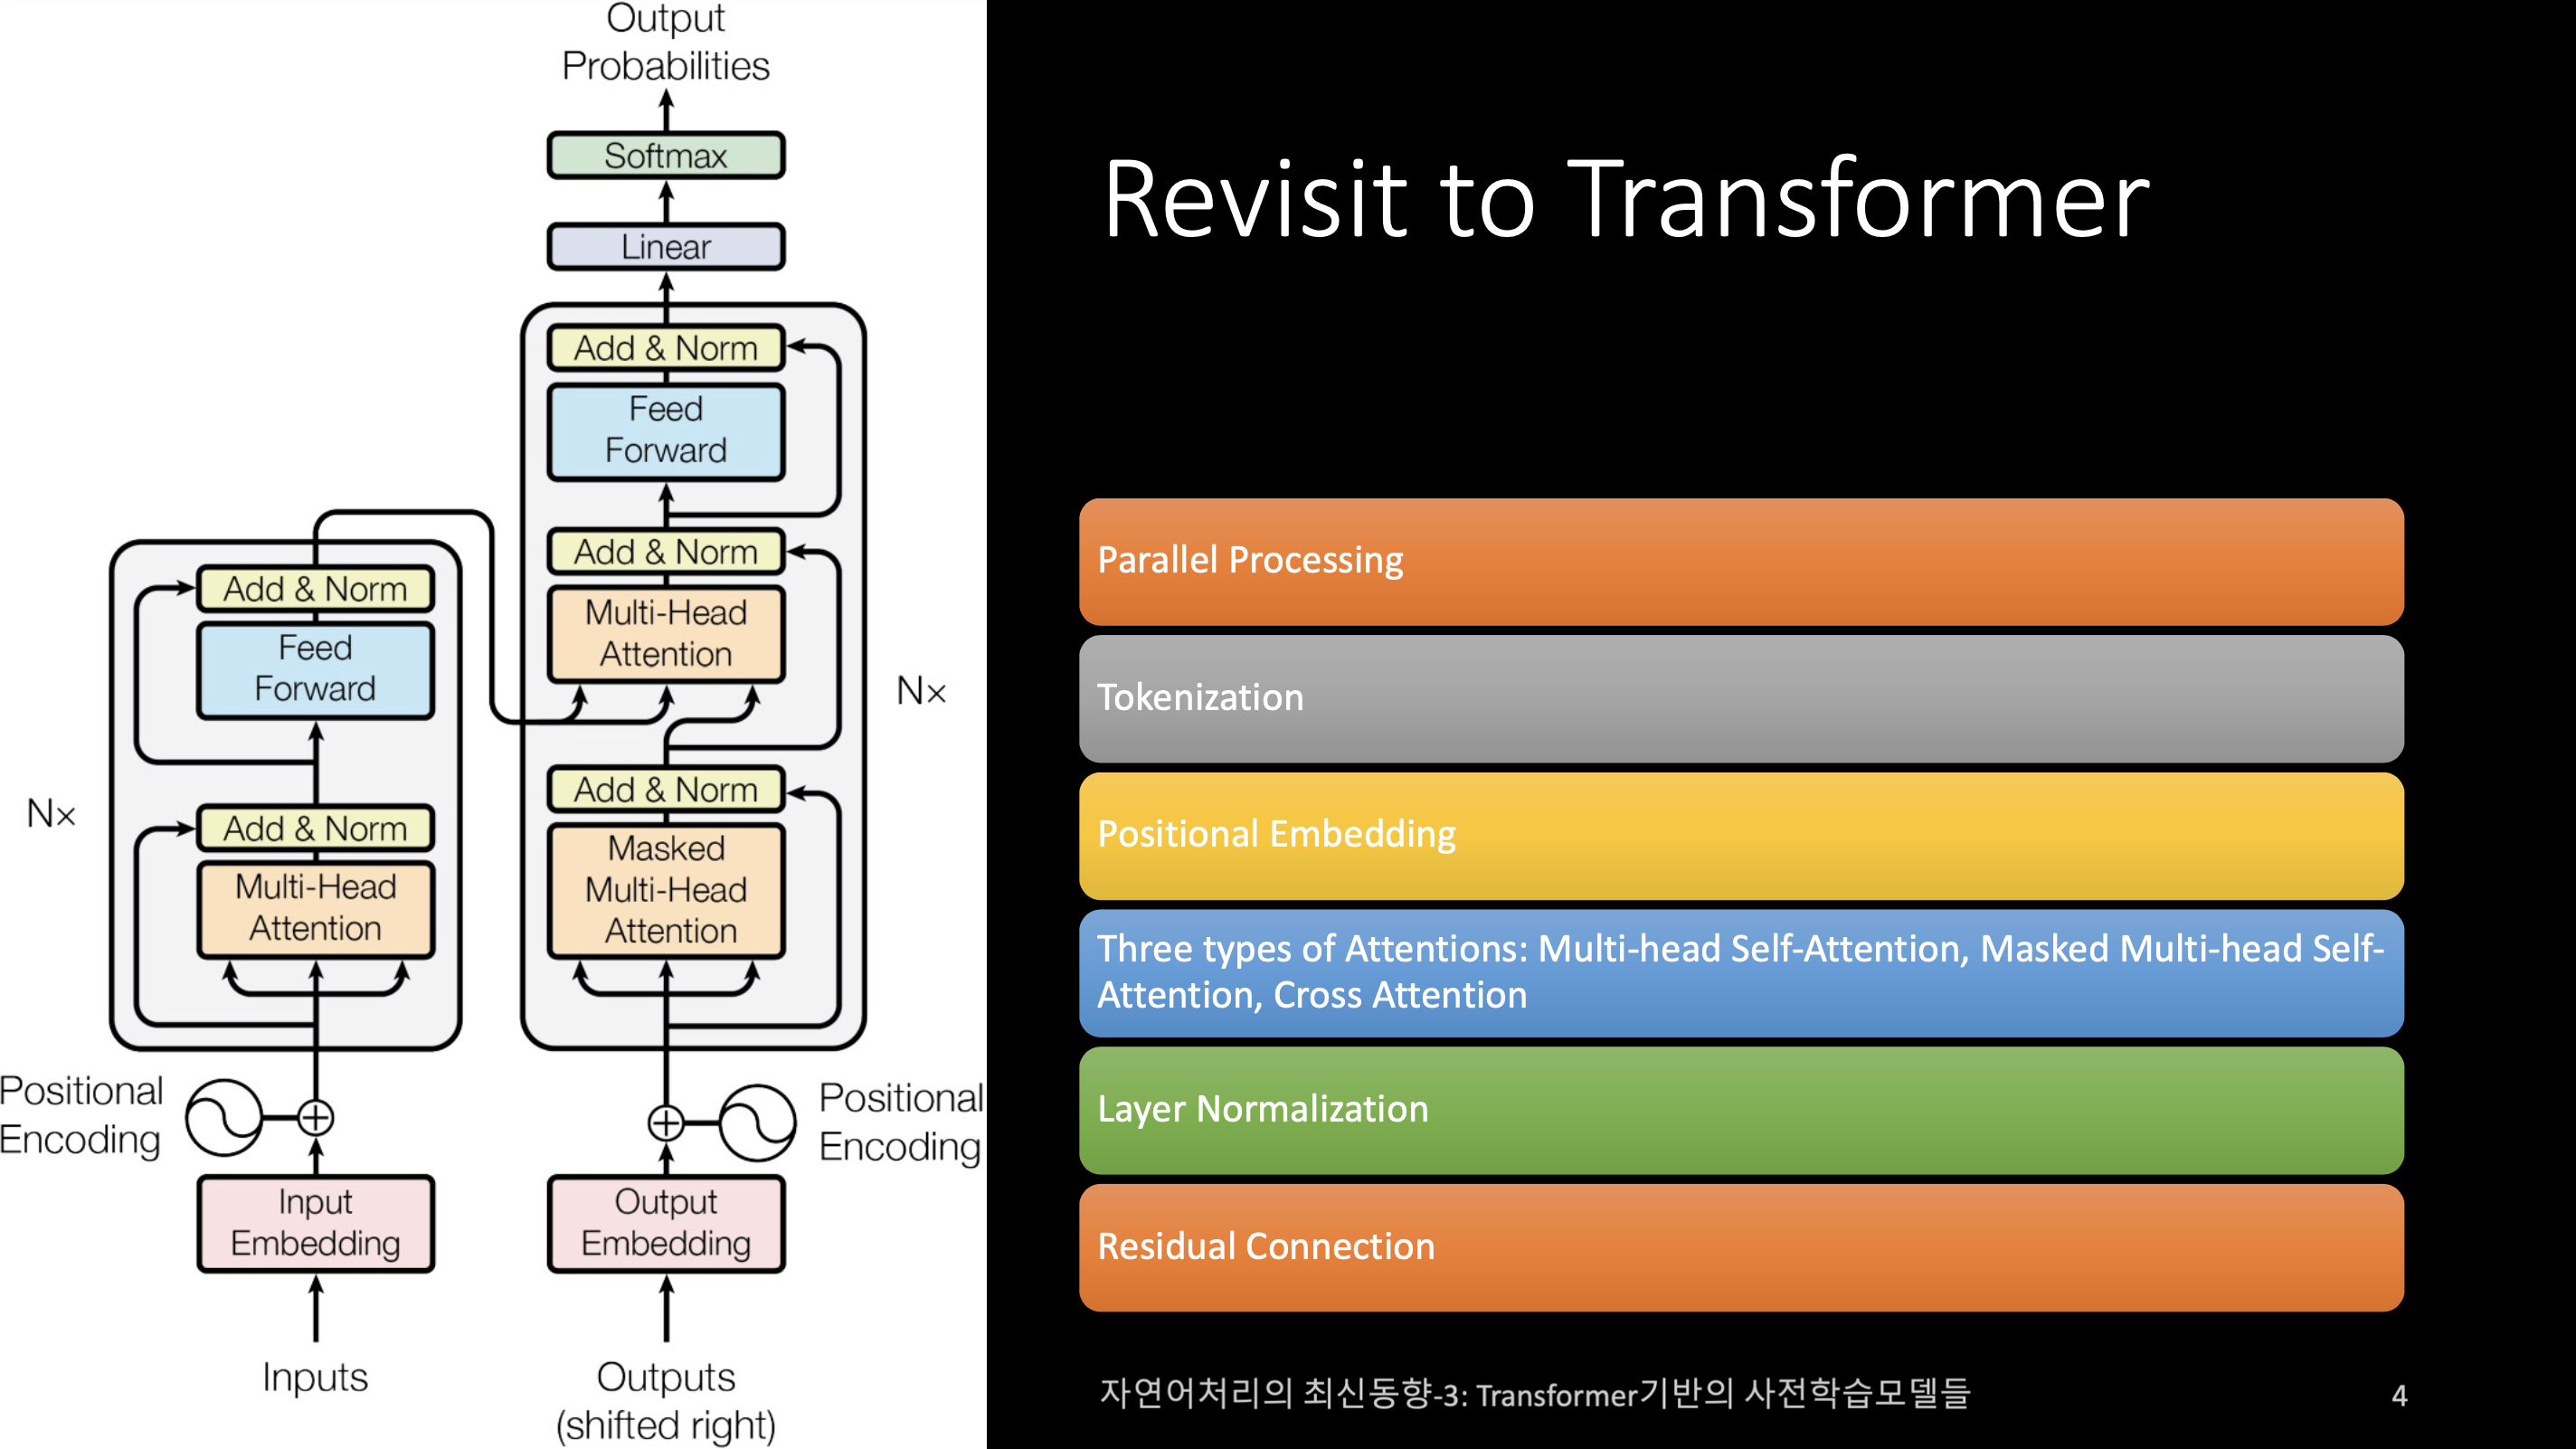

## Pre-training Language Models based on Transformer


<img src="https://ars.els-cdn.com/content/image/1-s2.0-S2666651021000231-gr9.jpg" width="80%">


### Self-supervised training algorithm

- we take a corpus of text as training material and at each time step t ask the model to predict the next word. 
- We call such a model **self-supervised** because we don’t have to add any special gold labels to the data; the natural sequence of words is its **own supervision!**

- The cross-entropy loss measures the difference between a predicted probability distribution and the correct distribution

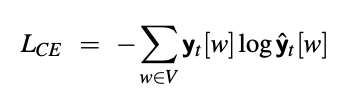




- the cross-entropy can be simplied as the negative log probability the model assigns to the next word in the training sequence, using one-hot vector.

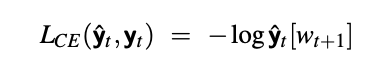

 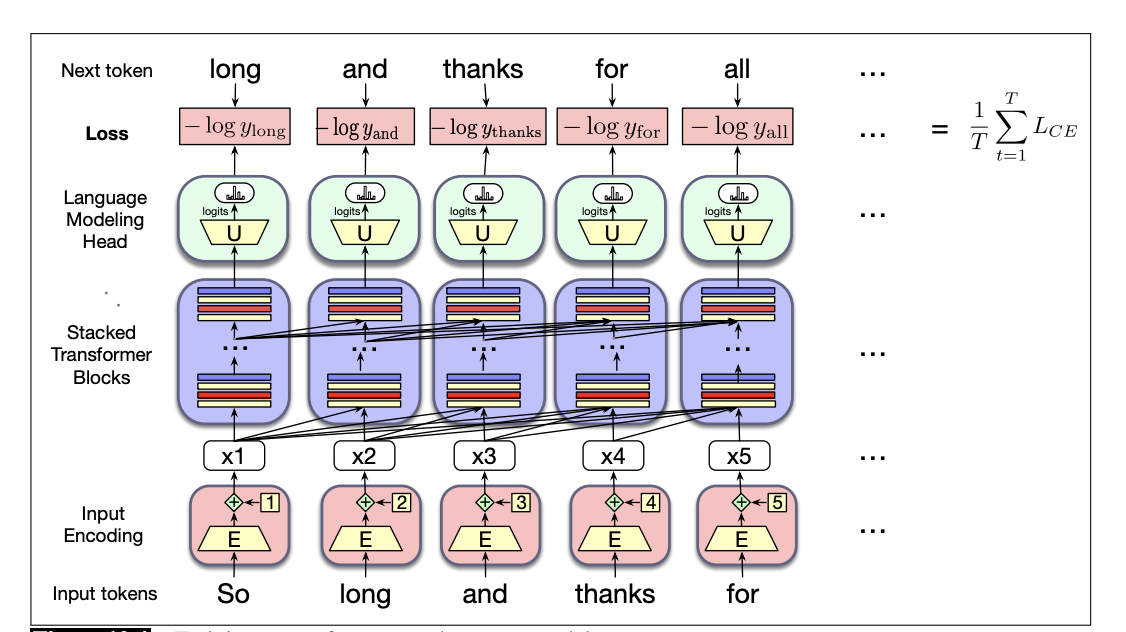                        
                         
                         Training a transformer as a langage model by SLP3

### Training Corpora for langauge models
- Training corpora are so large, they are likely to contain many natural examples that can be helpful for NLP tasks, such as question and answer pairs (for example from FAQ lists), translations of sentences between various languages, documents together with their summaries, and so on


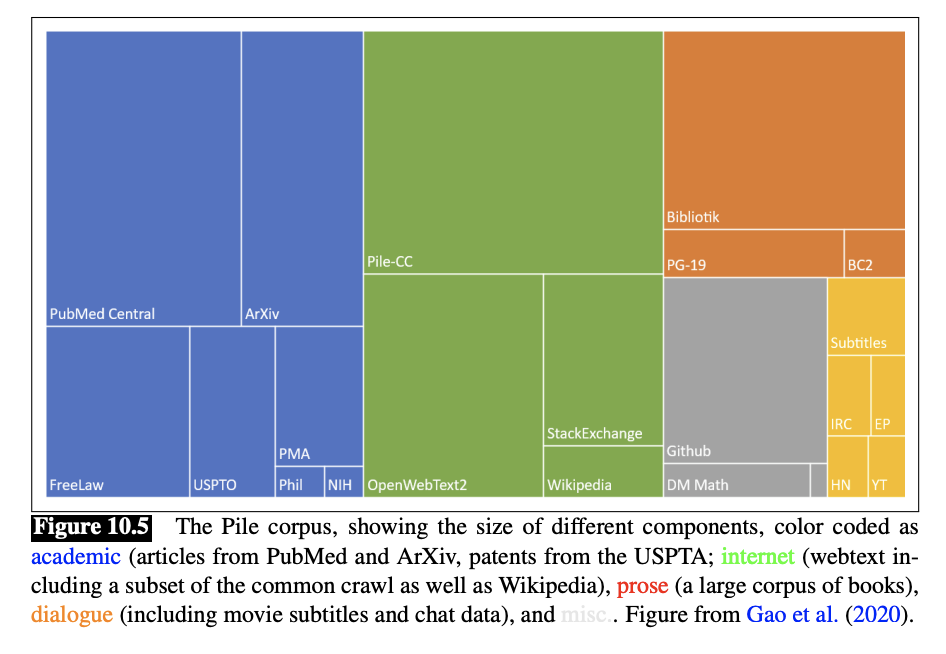



- Using large datasets scraped from the web to train language models poses ethical and legal questions:
- **Copyright**: Much of the text in these large datasets (like the collections of fiction and non-fiction books) is copyrighted. In some countries, like the United States, the fair use doctrine may allow copyrighted content to be used for transformative uses, but it’s not clear if that remains true if the language models are used to generate text that competes with the market for the text they are trained on
- **Data consent**: Owners of websites can indicate that they don’t want their sites to be crawled by web crawlers (either via a robots.txt file, or via Terms of
Service). 
- Recently there has been a sharp increase in the number of websites that have indicated that they don’t want large language model builders crawling their sites for training data.
- Because it’s not clear what legal status these indications have in different countries, or whether these restrictions are retroactive, what effect this will have on large pretraining datasets is unclear.
- **Privacy**: Large web datasets also have privacy issues since they contain private information like phone numbers and IP addresses. While filters are used to try to remove websites likely to contain large amounts of personal information, such filtering isn’t sufficient.

## Finetuning

- Although the enormous pretraining data for a large language model includes text from many domains, it’s often the case that we want to apply it in a new domain or task that might not have appeared sufficiently in the pre-training data. 
- For example, we might want a language model that’s specialized to legal or medical text. 
- Or we might have a multilingual language model that knows many languages but might benefit from some more data in our particular language of interest. 
- Or we want a language model that is specialized to a particular task.

### Finetuning
-  This process of taking a fully pretrained model and running additional training passes on some new data is 

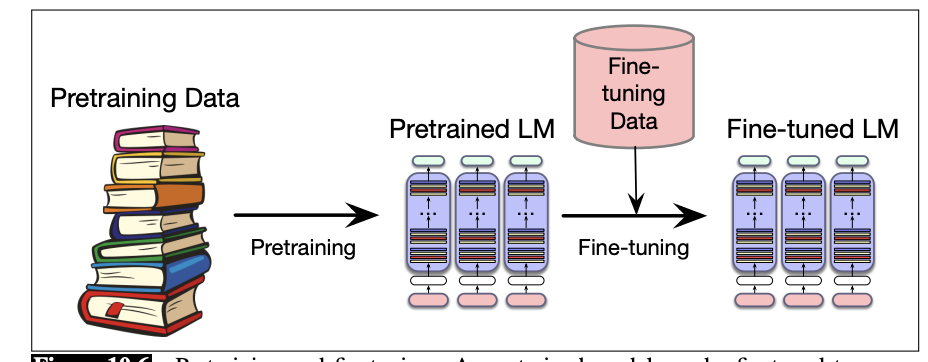

                 Pretraining and Finetuning

### Four kinds of finetuning


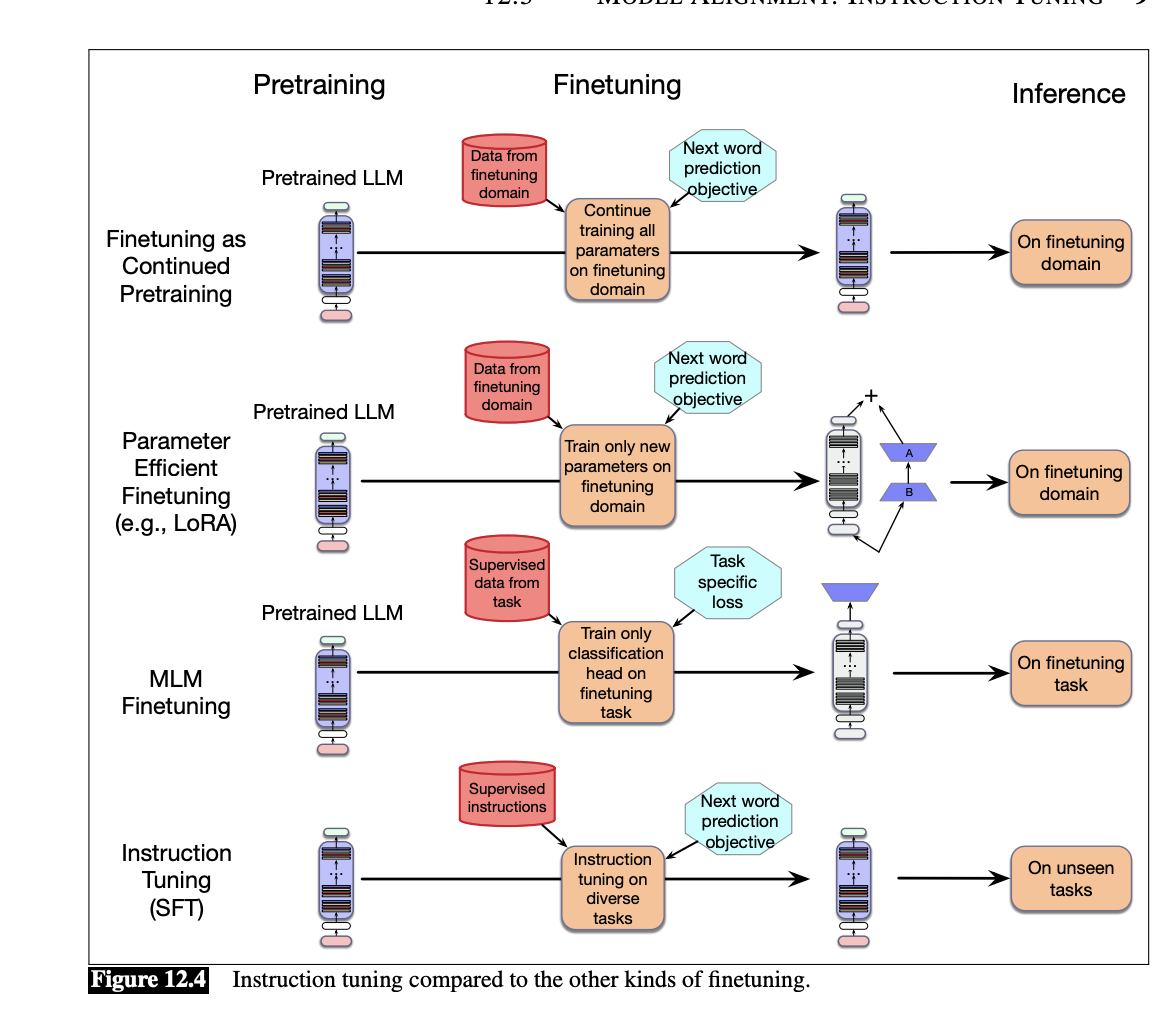

## Masked Language Model : BERT (Bidirectional Encoder Representations of Transformer)

## BERT

BERT is basically a trained Transformer Encoder stack. 

<img src="http://jalammar.github.io/images/bert-transfer-learning.png" width="60%">

<img src="http://jalammar.github.io/images/bert-base-bert-large-encoders.png" width="60%">

Both BERT model sizes have a large number of encoder layers (which the paper calls Transformer Blocks) – twelve for the Base version, and twenty four for the Large version. These also have larger feedforward-networks **(768 and 1024 hidden units respectively)**, and more attention heads **(12 and 16 respectively)** than the default configuration in the reference implementation of the Transformer in the initial paper **(6 encoder layers, 512 hidden units, and 8 attention heads).**


### Model Inputs

<img src="http://jalammar.github.io/images/bert-input-output.png" width="60%">

The first input token is supplied with a special [CLS] token for reasons that will become apparent later on. CLS here stands for Classification.



<img src="https://wikidocs.net/images/page/115055/%EA%B7%B8%EB%A6%BC7.PNG" width="60%">

- Attention Mask

<img src="https://wikidocs.net/images/page/115055/%EA%B7%B8%EB%A6%BC11.PNG" width="50%">

Just like the vanilla encoder of the transformer, BERT takes a sequence of words as input which keep flowing up the stack. Each layer applies self-attention, and passes its results through a feed-forward network, and then hands it off to the next encoder.


<img src="http://jalammar.github.io/images/bert-encoders-input.png" width="60%">
In terms of architecture, this has been identical to the Transformer up until this point (aside from size, which are just configurations we can set). It is at the output that we first start seeing how things diverge.

<img src="https://wikidocs.net/images/page/115055/%EA%B7%B8%EB%A6%BC2.PNG" width="60%">

- Transformer-based

<img src="https://wikidocs.net/images/page/115055/%EA%B7%B8%EB%A6%BC4.PNG" width="60%">



## A - Masked Language Modeling (MLM)

*“The masked language model randomly masks some of the tokens from the input, and the objective is to **predict the original vocabulary id of the masked word based only on its context**. Unlike **left-to-right language model pre-training**, the MLM objective allows the representation to fuse the left and the right context, which allows us to pre-train **a deep bidirectional Transformer.”*

The Google AI researchers masked **15% of the words in each sequence at random.** The task? To predict these masked words. A caveat here — the masked words were not always replaced by the masked tokens [MASK] because the [MASK] token would never appear during fine-tuning.

So, the researchers used the below technique:
- 80% of the time the words were replaced with the masked token [MASK]
- 10% of the time the words were replaced with random words
- 10% of the time the words were left unchanged

<img src="https://wikidocs.net/images/page/115055/%EA%B7%B8%EB%A6%BC9.PNG" width="60%">

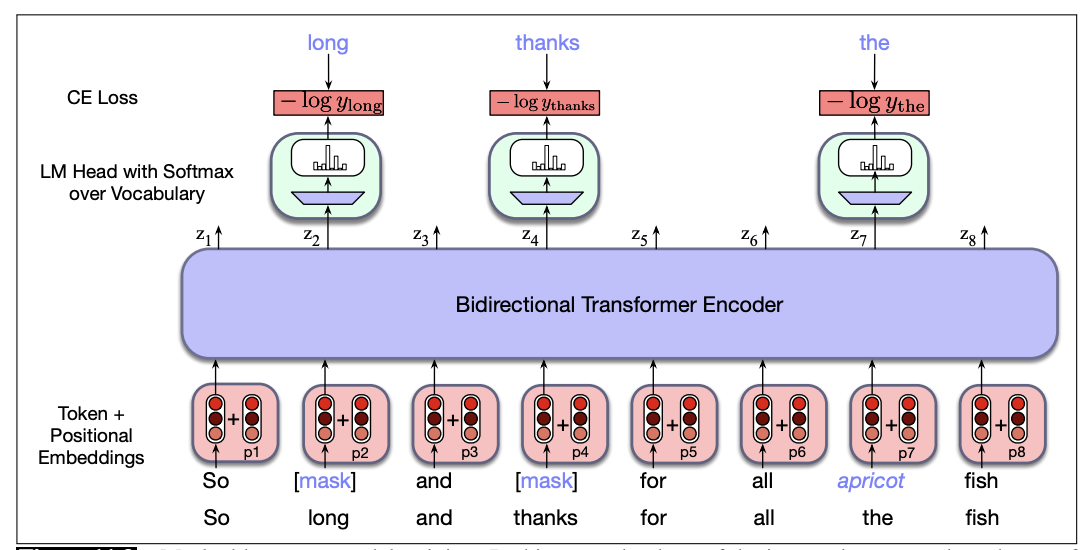

            Masked Language Model Training From [SLP3](https://web.stanford.edu/~jurafsky/slp3/11.pdf)

- For a given vector of input tokens in a sentence or batch be x, let the set of tokens that aremasked be M, the version of that sentence with some tokens replaced by masks be xmask, and the sequence of output vectors be h. 
- For a given input token xi, such asthe word *long* above, the loss is the probability of the correct word long, given xmask (as summarized in the single output vector h

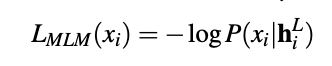

- The gradients that form the basis for the weight updates are based on the averageloss over the sampled learning items from a single training sequence (or batch of sequences).

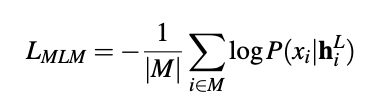

- Note that only the tokens in M play a role in learning; the other words play no role in the loss function, so in that sense BERT and its descendents are inefficient; only 15% of the input samples in the training data are actually used for training weights.

## B- Next Sentence Prediction

Generally, language models do not capture the relationship between consecutive sentences. BERT was pre-trained on this task as well.

For language model pre-training, BERT uses pairs of sentences as its training data. The selection of sentences for each pair is quite interesting. Let’s try to understand it with the help of an example.

Imagine we have a text dataset of 100,000 sentences and we want to pre-train a BERT language model using this dataset. So, there will be 50,000 training examples or pairs of sentences as the training data.

- For 50% of the pairs, the second sentence would actually be the next sentence to the first sentence
- For the remaining 50% of the pairs, the second sentence would be a random sentence from the corpus
- The labels for the first case would be ‘IsNext’ and ‘NotNext’ for the second case

- 이어지는 문장의 경우   
Sentence A : The man went to the store.   
Sentence B : He bought a gallon of milk.   
Label = IsNextSentence   
   
- 이어지는 문장이 아닌 경우 경우   
Sentence A : The man went to the store.   
Sentence B : dogs are so cute.   
Label = NotNextSentence   

<img src="https://wikidocs.net/images/page/115055/%EA%B7%B8%EB%A6%BC10.PNG" width="60%">


- [SEP]   
    - next sentence prediction
    - QA
    - NLI(Natural Language Inference)

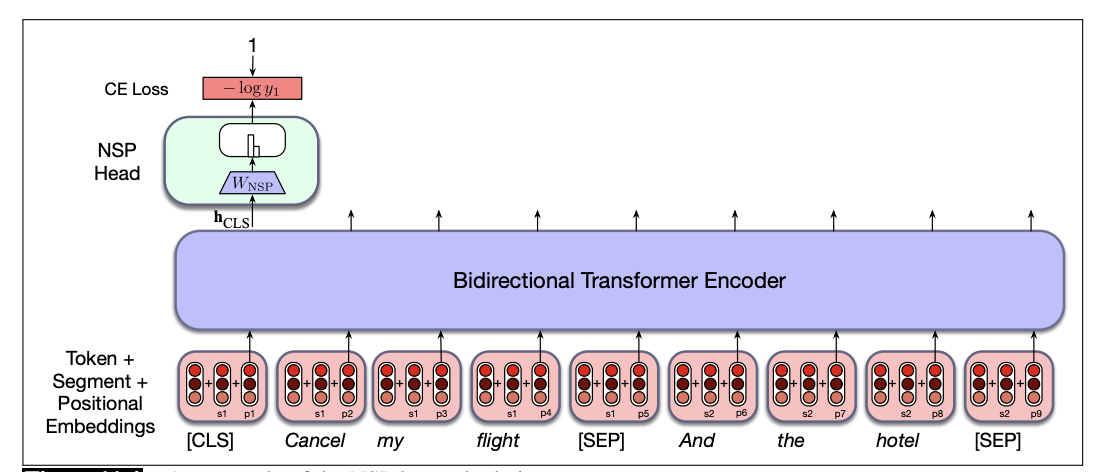

               NSP Loss Calculation from SLP3

## Contextual Embeddings
- Given a pretrained language model and a novel input sentence, we can think of the sequence of model outputs as constituting contextual embeddings for each token in **contextual embeddings** for each token in the input. 
- These contextual embeddings are vectors representing some aspect of the meaning of a token in context, and can be used for any task requiring the meaning of tokens or words.

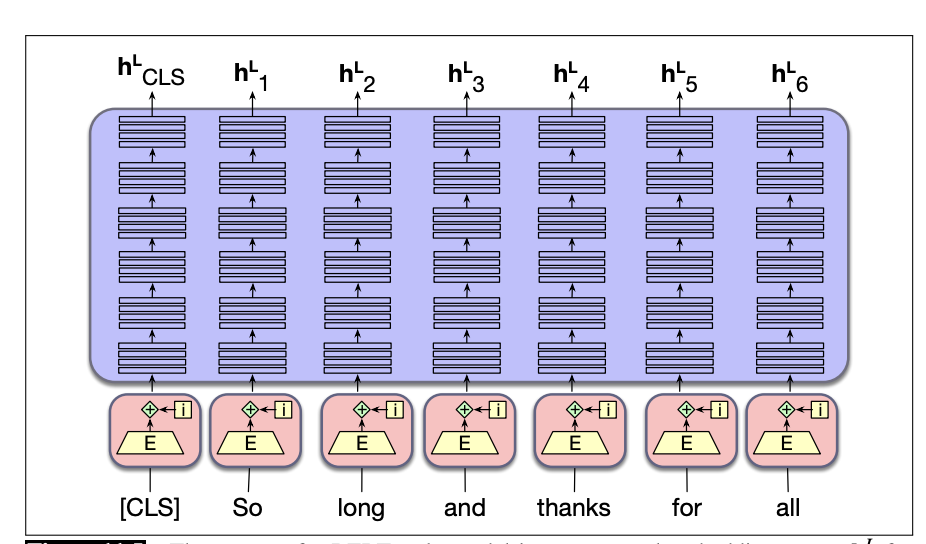

## FineTuning for Sequence Classification

- The power of pretrained language models lies in their ability to extract generalizations from large amounts of text—generalizations that are useful for myriad downstream applications. There are two ways to make practical use of the generalizations to solve downstream tasks. 
- The most common way is to use natural language to **prompt** the model, putting it in a state where it contextually generates what we want.
- An alternative way to use pretrained language models **finetuning** for downstream applications: a version of the finetuning paradigm
- In the kind of finetuning used for masked language models, we add applicationspecific circuitry (often called a special **head**) on top of pretrained models, taking their output as its input. The finetuning process consists of using labeled data about the application to train these additional application-specific parameters. 
- Typically, this training will either freeze or make only **minimal adjustments** to the pretrained language model parameters.
- The most common kinds of finetuning : sequence classification, sentence-pair classification, and sequence labeling.


### Sequence Class




That vector can now be used as the input for a classifier of our choosing. The paper achieves great results by just using a single-layer neural network as the classifier.

<img src="http://jalammar.github.io/images/bert-classifier.png" width="60%">
If you have more labels (for example if you’re an email service that tags emails with “spam”, “not spam”, “social”, and “promotion”), you just tweak the classifier network to have more output neurons that then pass through softmax.


### Sequence Classification

BERT is basically a trained Transformer Encoder stack. 

<img src="http://jalammar.github.io/images/bert-transfer-learning.png" width="60%">

<img src="http://jalammar.github.io/images/bert-classifier.png" width="60%">
If you have more labels (for example if you’re an email service that tags emails with “spam”, “not spam”, “social”, and “promotion”), you just tweak the classifier network to have more output neurons that then pass through softmax.

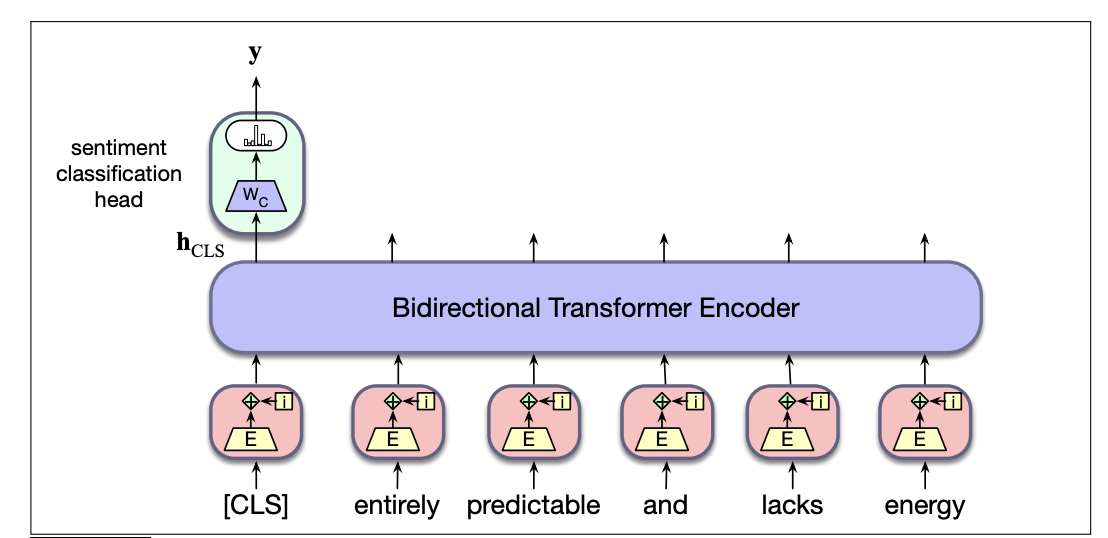

### BERT Tokenizer: Wordpiece

In [1]:
import pandas as pd
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

2024-05-15 20:42:27.638954: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-15 20:42:27.675579: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 20:42:27.913532: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 20:42:27.913675: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 20:42:27.940125: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

In [2]:
result = tokenizer.tokenize('In terms of architecture, this has been identical to the Transformer')
print(result)

['in', 'terms', 'of', 'architecture', ',', 'this', 'has', 'been', 'identical', 'to', 'the', 'transform', '##er']


In [3]:
## Vocab 단어 확인
print(tokenizer.vocab['embedding'])

KeyError: 'embedding'

In [4]:
print(tokenizer.vocab['love'])

2293


In [5]:
print(tokenizer.vocab['transform'])

10938


In [6]:
print(tokenizer.vocab['##er'])

2121


In [7]:
# BERT의 단어 집합을 vocabulary.txt에 저장
with open('vocabulary.txt', 'w') as f:
  for token in tokenizer.vocab.keys():
    f.write(token + '\n')

In [8]:
df = pd.read_fwf('vocabulary.txt', header=None)
df

0
0          [PAD]
1      [unused0]
2      [unused1]
3      [unused2]
4      [unused3]
...          ...
30517        ##．
30518        ##／
30519        ##：
30520        ##？
30521        ##～

[30522 rows x 1 columns]

In [9]:
df.loc[5849].values[0]

'commission'

- special tokens   
[PAD] - 0   
[UNK] - 100   
[CLS] - 101   
[SEP] - 102   
[MASK] - 103   

## Autoregressive / Causal Language Model

- iteratively predict words left-to-right from earlier words
- We’ll first introduce training, seeing how language models are self-trained by iteratively being taught to guess the next word in the text from the prior words

###  Conditional Generation

-  Conditional conditional generation is the task of generating text conditioned on an input piece of text. 
- That is, we give the LLM an input piece of text, generally called a **prompt**, and then have the LLM continue generating text token by token, conditioned on the prompt. 
- The fact that transformers have such long contexts (many thousands of tokens) makes them very powerful for conditional generation, because they can look back so far into the prompting text.

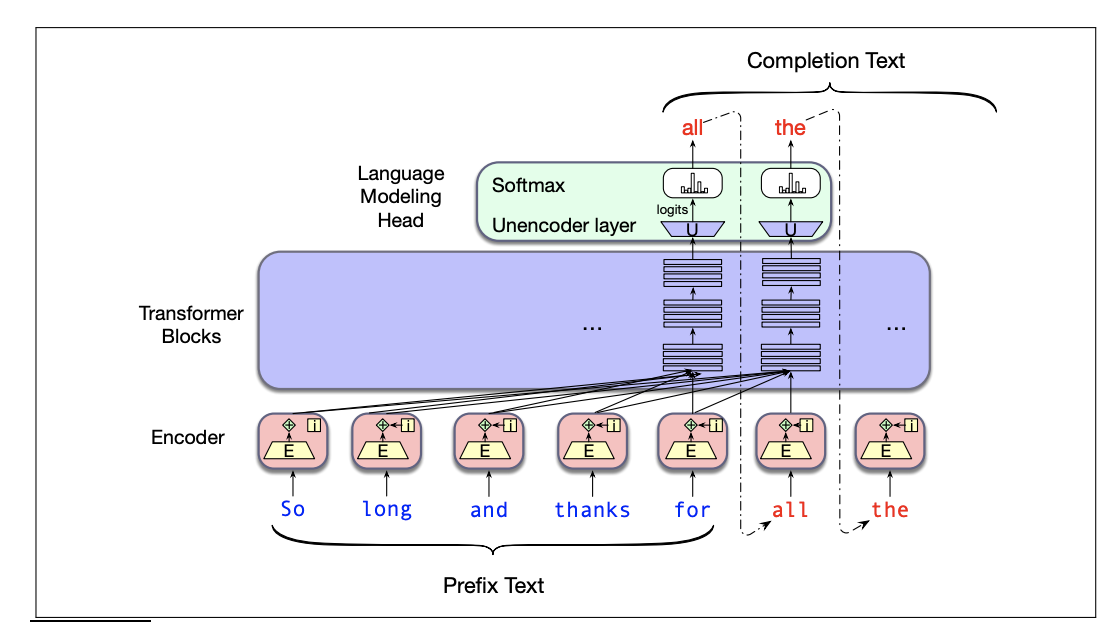

          Left-to-right(autoregressive) text completion with transformer-based large language models from [SLP3](https://web.stanford.edu/~jurafsky/slp3/10.pdf)

### why should we care about predicting upcoming words or tokens? 
- The insight of large language modeling is that many practical NLP tasks can be cast as **word prediction**, and that a powerful-enough language model can solve them with a high degree of accuracy
1. Sentiment Analysis
- The sentiment of the sentence ‘‘I like Jackie Chan" is:

P(positive|The sentiment of the sentence ‘‘I like Jackie Chan" is:)
P(negative|The sentiment of the sentence ‘‘I like Jackie Chan" is:)

2. Question-Answering

Q: Who wrote the book ‘‘The Origin of Species"? A:

P(w|Q: Who wrote the book ‘‘The Origin of Species"? A:)
P(w|Q: Who wrote the book ‘‘The Origin of Species"? A: Charles)

3. Text Summarization

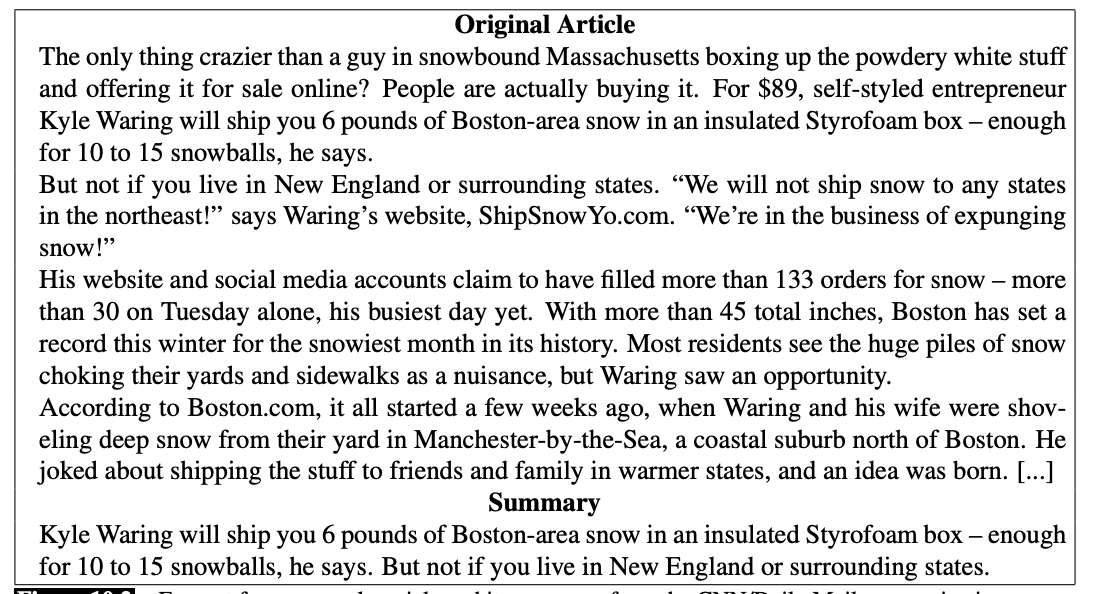

       Excerpt from a sample article and its summary from the CNN/Daily Mail summarizaiton Corpus from SLP3
       


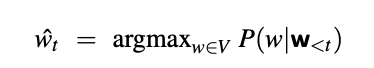




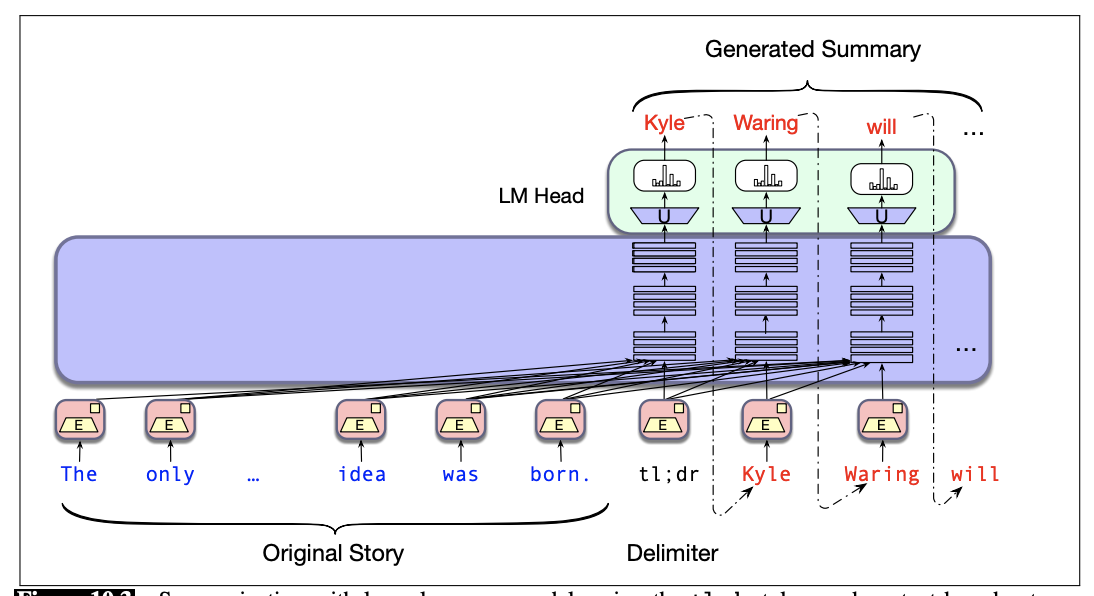

           Summarization with large language models using tl;dr token and context-based autoregressive generation by SLP3

### Sampling for LLM Generation
- The core of the generation process for large language models is the task of choosing the single word to generate next based on the context and based on the probabilities that the model assigns to possible words. 
- This task of choosing a word to generate based on the model’s probabilities is called **decoding**. 
- Decoding from a language model in a left-to-right manner (or right-to-left for languages like Arabic in which we read from right to left), and thus repeatedly choosing the next word conditioned on our previous choices is called **autoregressive generation or causal LM generation**
- The most common method for decoding in large language models is **sampling**.
- Sampling from a model’s distribution over words means to choose random words according to their probability assigned by the model.

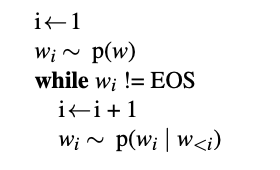


#### Random Sampling
- The problem is that even though random sampling is mostly going to generate sensible, high-probable words, there are many odd, low probability words in the tail of the distribution, and even though each one is low probability, if you add up all the rare words, they constitute a large enough portion of the distribution that they get chosen often enough to result in generating weird sentences. 

- Trading off two important factors in generation: **quality and diversity**
- Methods that emphasize the most probable words tend to produce generations that are rated by people as more accurate, more coherent, and more factual, but also more boringand more repetitive. 
- Methods that give a bit more weight to the middle-probability words tend to be more creative and more diverse, but less factual and more likely to be incoherent or otherwise low-quality

#### Top-k sampling
- Top-k sampling is a simple generalization of greedy decoding. 
- Instead of choosing the single most probable word to generate, we first truncate the distribution to the top k most likely words, renormalize to produce a legitimate probability distribution, and then randomly sample from within these k words according to their renormalized probabilities
- When k = 1, top-k sampling is identical to greedy decoding. 
- Setting k to a larger number than 1 leads us to sometimes select a word which is not necessarily the most probable, but is still probable enough, and whose choice results in generating more diverse but still high-enough-quality text

### Nucleus or top-p sampling
- One problem with top-k sampling is that k is fixed, but the shape of the probability distribution over words differs in different contexts. 
- If we set k = 10, sometimes the top 10 words will be very likely and include most of the probability mass, but other times the probability distribution will be flatter and the top 10 words will only include a small part of the probability mass
- Top-p sampling or nucleus sampling is to keep not the top k words, but the top p percent of the probability mass.
- The goal is the same; to truncate the distribution to remove the very unlikely words.
- But by measuring probability rather than the number of words, the hope is that the measure will be more robust in very different contexts, dynamically increasing and decreasing the pool of word candidates.
- Given a distribution P(wt|w<t), the top-p vocabulary V(p) is the smallest set of words such that

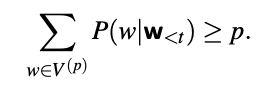




### Temperature sampling

- In temperature sampling, we don’t truncate the distribution, but instead reshape temperature sampling it. 
- The intuition for temperature sampling comes from thermodynamics, where a system at a high temperature is very flexible and can explore many possible states, while a system at a lower temperature is likely to explore a subset of lower energy (better) states. 
- In low-temperature sampling, we smoothly increase the probability of the most probable words and decrease the probability of the rare words.
- We implement this intuition by simply dividing the logit by a temperature parameter τ before we normalize it by passing it through the softmax. 
- In low-temperature sampling, τ ∈ (0,1]. 
- Thus instead of computing the probability distribution over the vocabulary directly from the logit, we instead first divide the logits by τ, computing the probability vector y as

                                       y = softmax(u/τ) 
                                       
- When τ is close to 1 the distribution doesn’t change much.
- But the lower τ is, the larger the scores being passed to the softmax (dividing by a smaller fraction τ ≤ 1 results in making each score larger). 
- Recall that one of the useful properties of a softmax is that it tends to push high values toward 1 and low values toward 0. 
- Thus when larger numbers are passed to a softmax the result is a distribution with increased probabilities of the most high-probability words and decreased probabilities of the low probability words, making the distribution more greedy. 
- As τ approaches 0 the probability of the most likely word approaches 1                                     

## Roundup: BERT VS GPT

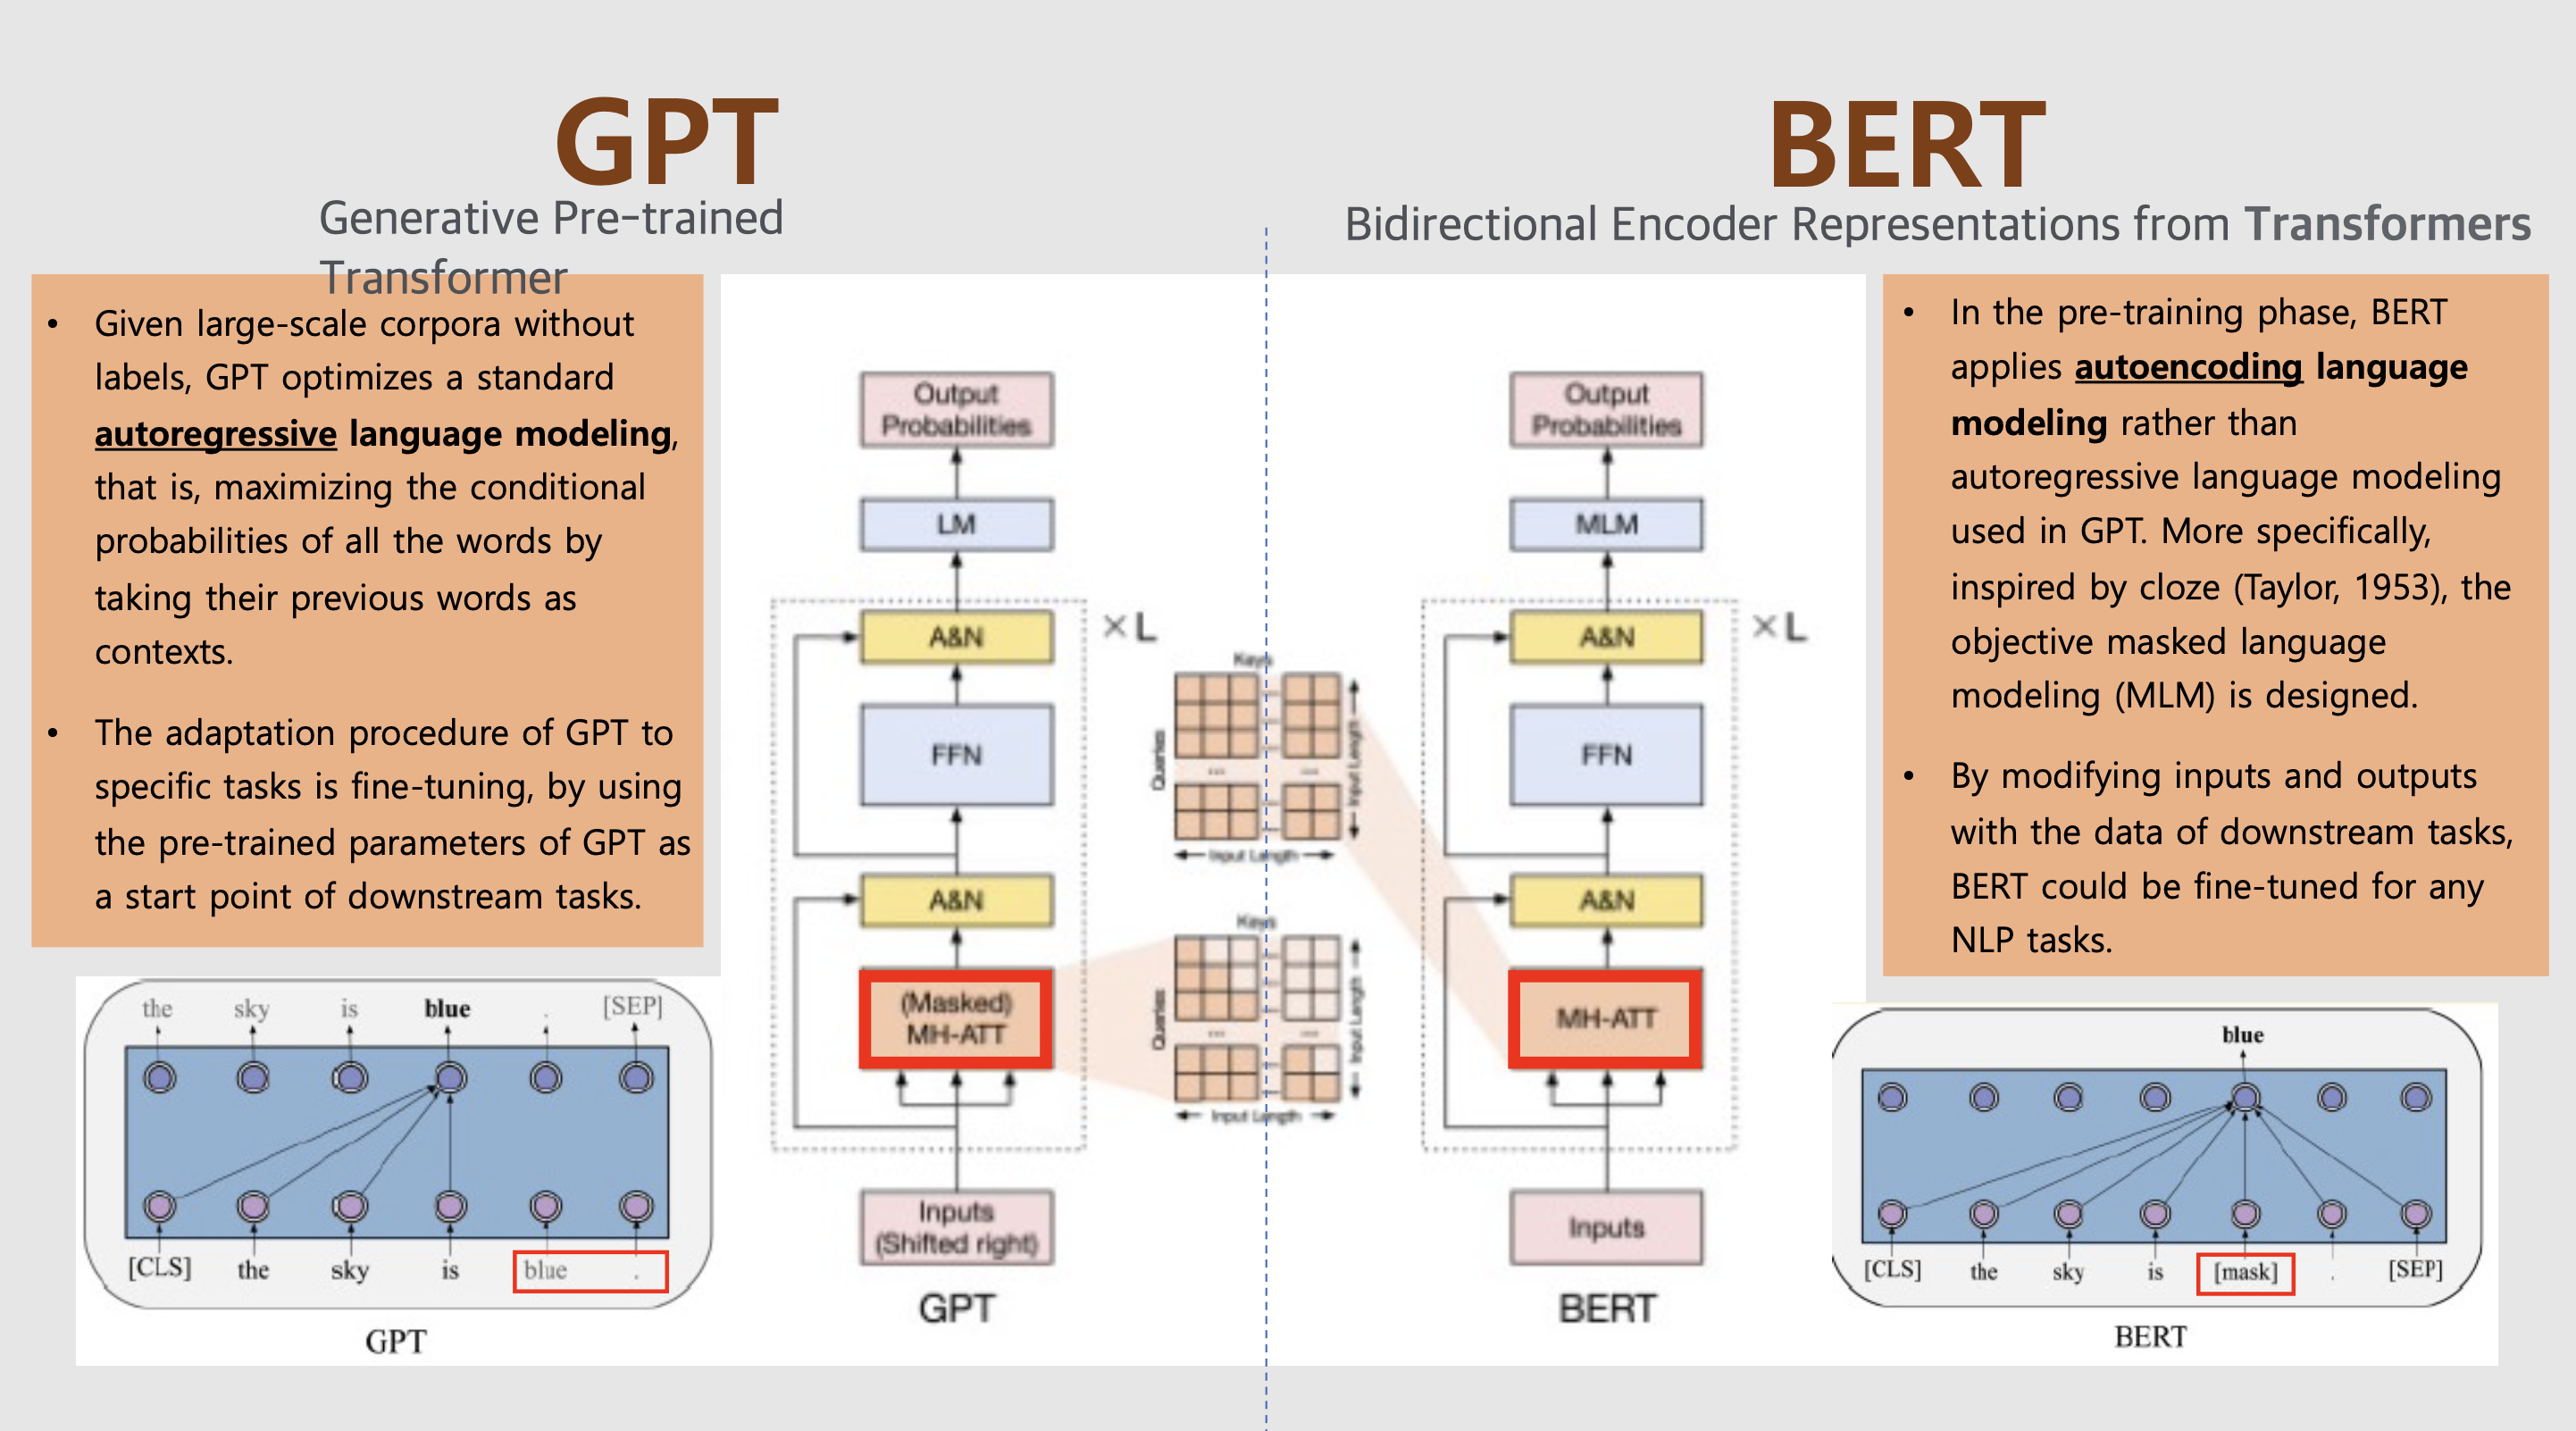